# Prep

In [364]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/final.csv', sep=';', encoding='utf-8')
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

print(df.columns)

Index(['NUTS Region', 'CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2',
       'Euro per inhabitant',
       'Euro per inhabitant in percentage of the EU27 (from 2020) average',
       'Million euro',
       'Million purchasing power standards (PPS, EU27 from 2020)',
       'Million units of national currency',
       'Purchasing power standard (PPS, EU27 from 2020), per inhabitant',
       'Purchasing power standard (PPS, EU27 from 2020), per inhabitant in percentage of the EU27 (from 2020) average',
       'Acute myocardial infarction including subsequent myocardial infarction',
       'All causes of death (A00-Y89) excluding S00-T98',
       'Asthma and status asthmaticus', 'Cerebrovascular diseases',
       'Chronic lower respiratory diseases', 'Diabetes mellitus',
       'Malignant melanoma of skin', 'Malignant neoplasm of breast',
       'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal',
       'Malignant neoplasm of trachea, bronchus and lung',
       'Ment

In [365]:
df

,NUTS Region,CO,NO,NO2,O3,PM10,SO2,Euro per inhabitant,Euro per inhabitant in percentage of the EU27 (from 2020) average,Million euro,...,Cerebrovascular diseases,Chronic lower respiratory diseases,Diabetes mellitus,Malignant melanoma of skin,Malignant neoplasm of breast,"Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal","Malignant neoplasm of trachea, bronchus and lung",Mental and behavioural disorders (F00-F99),Other ischaemic heart diseases,Other mental and behavioural disorders (remainder of F00-F99)
0,Ipeiros,NaN,NaN,NaN,NaN,NaN,NaN,11938.461538,44.846154,4036.580000,...,211.805833,36.643750,20.459167,2.352917,23.101250,25.432917,90.314583,14.361250,72.798333,1.040476
1,Noord-Holland,0.350665,8.596724,22.111768,48.346758,17.187568,0.280845,52623.076923,193.846154,146071.670000,...,121.350333,80.449667,36.637333,8.535333,33.145667,59.016333,107.896000,136.557667,43.475333,6.919000
2,Ticino,0.292759,7.238381,20.002353,54.097268,16.035262,1.833290,75160.000000,265.400000,25480.444286,...,87.859000,45.403667,16.950667,6.863667,30.790667,38.163667,81.040667,90.985333,115.780667,13.820667
3,Prov. Limburg (BE),NaN,NaN,NaN,NaN,NaN,NaN,30391.666667,109.083333,26263.447500,...,114.480667,80.731333,21.405000,4.401333,27.651667,40.096333,106.300000,95.517667,50.638667,4.148000
4,Friesland (NL),NaN,NaN,NaN,NaN,NaN,NaN,28584.615385,105.384615,18484.637692,...,130.627000,80.707333,39.465333,8.305333,34.343333,57.571000,104.180000,139.221000,46.715000,5.152333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Budapest,0.530538,NaN,27.494520,43.732637,24.965000,4.569619,23992.307692,87.153846,41775.120000,...,195.681667,110.188667,39.408333,5.746000,43.854000,86.552667,137.020000,63.362667,507.218000,1.968000
116,Prov. West-Vlaanderen,NaN,NaN,NaN,NaN,NaN,NaN,36100.000000,129.500000,42800.698333,...,113.823000,62.401333,24.019333,5.966000,34.772000,43.693333,84.009000,86.694000,54.208333,4.042333
117,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,22538.461538,83.384615,19104.539231,...,136.368667,49.405667,125.484667,3.831667,27.366000,34.242667,64.861333,63.785333,107.540333,2.143000
118,Algarve,NaN,2.013671,7.511391,58.004739,13.632518,NaN,18423.076923,67.846154,8051.043846,...,176.894667,37.646667,58.679667,5.073667,27.421000,64.250667,68.664667,56.234667,35.688667,1.191667


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 27 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   NUTS Region                                                                                                    120 non-null    object 
 1   CO                                                                                                             48 non-null     float64
 2   NO                                                                                                             57 non-null     float64
 3   NO2                                                                                                            69 non-null     float64
 4   O3                                                

In [367]:
to_be_dropped = [
    "CO", "NO", "SO2",
    "Euro per inhabitant in percentage of the EU27 (from 2020) average",
    "Million euro",
    "Million purchasing power standards (PPS, EU27 from 2020)",
    "Million units of national currency",
    "Purchasing power standard (PPS, EU27 from 2020), per inhabitant in percentage of the EU27 (from 2020) average",

]
df = df.drop(to_be_dropped, axis=1)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 119
Data columns (total 19 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   NUTS Region                                                                      63 non-null     object 
 1   NO2                                                                              63 non-null     float64
 2   O3                                                                               63 non-null     float64
 3   PM10                                                                             63 non-null     float64
 4   Euro per inhabitant                                                              63 non-null     float64
 5   Purchasing power standard (PPS, EU27 from 2020), per inhabitant                  63 non-null     float64
 6   Acute myoca

In [386]:
DISEASE = 'Other ischaemic heart diseases' 

y = df[DISEASE]
to_be_dropped_diseases = [
 'NUTS Region',
 'Acute myocardial infarction including subsequent myocardial infarction',
 'All causes of death (A00-Y89) excluding S00-T98',
 'Asthma and status asthmaticus',
 'Chronic lower respiratory diseases' ,
 'Cerebrovascular diseases',
 'Diabetes mellitus',
 'Malignant melanoma of skin' ,
 'Malignant neoplasm of breast',
 'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal',
 'Malignant neoplasm of trachea, bronchus and lung',
 'Mental and behavioural disorders (F00-F99)',
 'Other ischaemic heart diseases',
 'Other mental and behavioural disorders (remainder of F00-F99)',
 ]
x = df.drop(to_be_dropped_diseases, axis=1)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 119
Data columns (total 5 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   NO2                                                              63 non-null     float64
 1   O3                                                               63 non-null     float64
 2   PM10                                                             63 non-null     float64
 3   Euro per inhabitant                                              63 non-null     float64
 4   Purchasing power standard (PPS, EU27 from 2020), per inhabitant  63 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [369]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

x_train.head()

,NO2,O3,PM10,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant"
99,23.779419,52.413740,18.345783,29438.461538,29207.692308
21,20.958362,48.378223,23.129016,25930.769231,25707.692308
93,17.139802,55.683205,15.600000,20238.461538,20076.923077
58,23.611861,50.417854,14.215780,76520.000000,49460.000000
67,20.495891,41.698292,16.811052,33161.538462,29661.538462


In [370]:
y_train.to_frame()

,Chronic lower respiratory diseases
99,50.079667
21,54.389667
93,60.484000
58,47.305667
67,65.337000
36,67.876667
10,56.631333
101,58.543667
2,45.403667
23,24.512000


In [371]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


SCALE = False

if SCALE:
    x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)
else:
    x_train = pd.DataFrame(x_train, index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(x_test, index=x_test.index, columns=x_test.columns)

x_train

,NO2,O3,PM10,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant"
99,23.779419,52.413740,18.345783,29438.461538,29207.692308
21,20.958362,48.378223,23.129016,25930.769231,25707.692308
93,17.139802,55.683205,15.600000,20238.461538,20076.923077
58,23.611861,50.417854,14.215780,76520.000000,49460.000000
67,20.495891,41.698292,16.811052,33161.538462,29661.538462
36,27.852901,43.206775,25.479143,20276.923077,30984.615385
10,14.902625,46.797823,19.933431,13115.384615,19161.538462
101,22.287633,56.413269,12.536929,34846.153846,32053.846154
2,20.002353,54.097268,16.035262,75160.000000,48600.000000
23,13.897801,48.259522,23.158181,8738.461538,14769.230769


In [372]:
df_train = y_train.to_frame().join(x_train)
df_test = y_test.to_frame().join(x_test)

# print number of rows and columns in the dataset
print("Training dataset has {} rows and {} columns.".format(*df_train.shape))
df_train

Training dataset has 44 rows and 6 columns.


,Chronic lower respiratory diseases,NO2,O3,PM10,Euro per inhabitant,"Purchasing power standard (PPS, EU27 from 2020), per inhabitant"
99,50.079667,23.779419,52.413740,18.345783,29438.461538,29207.692308
21,54.389667,20.958362,48.378223,23.129016,25930.769231,25707.692308
93,60.484000,17.139802,55.683205,15.600000,20238.461538,20076.923077
58,47.305667,23.611861,50.417854,14.215780,76520.000000,49460.000000
67,65.337000,20.495891,41.698292,16.811052,33161.538462,29661.538462
36,67.876667,27.852901,43.206775,25.479143,20276.923077,30984.615385
10,56.631333,14.902625,46.797823,19.933431,13115.384615,19161.538462
101,58.543667,22.287633,56.413269,12.536929,34846.153846,32053.846154
2,45.403667,20.002353,54.097268,16.035262,75160.000000,48600.000000
23,24.512000,13.897801,48.259522,23.158181,8738.461538,14769.230769


# Analysis

In [373]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Model

In [374]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

reg = RandomForestRegressor(**params)

reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)



In [375]:
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
print("R2 train: ", R2_train)
print("R2 test: ", R2_test)

R2 train:  0.720068381812985
R2 test:  -0.00986016544028101


In [376]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE train: ", MSE_train)
print("MSE test: ", MSE_test)

MSE train:  106.97825599330517
MSE test:  234.92328740661293


In [377]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE train: ", RMSE_train)
print("RMSE test: ", RMSE_test)

RMSE train:  10.343029343152091
RMSE test:  15.327207423618072


In [378]:
# print the values of some of the y variables
print("y_train: ", y_train[:5])

y_train:  [50.07966667 54.38966667 60.484      47.30566667 65.337     ]


# Visualization

In [379]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

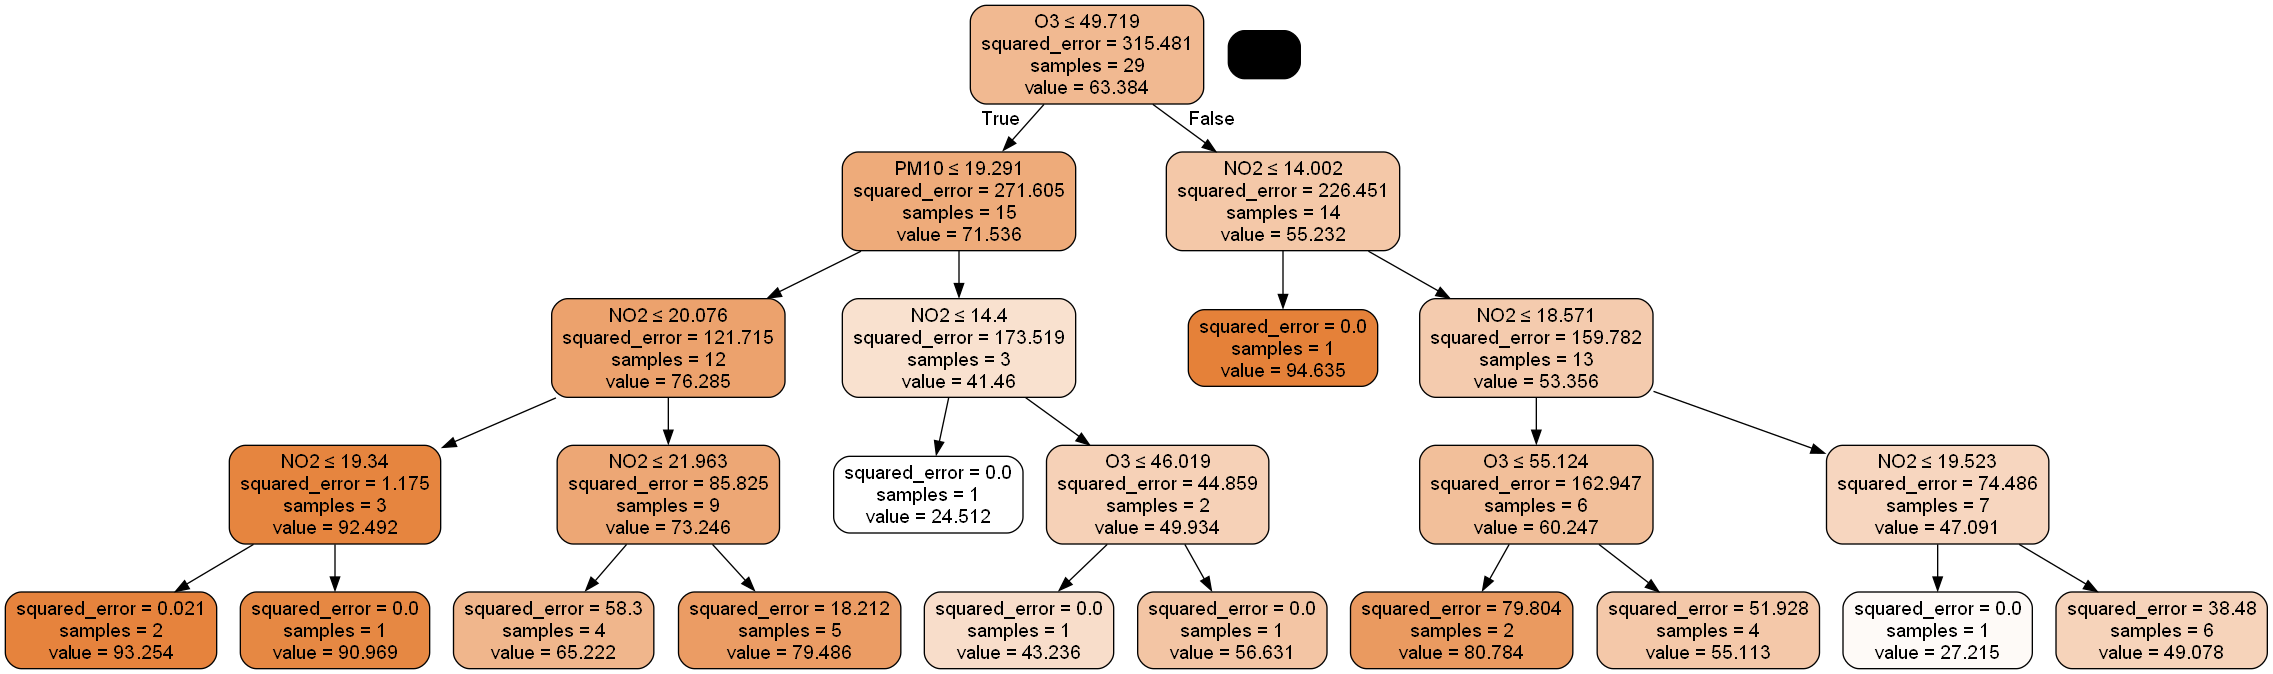

In [380]:
# export the decision tree to a tree.dot file
dot_data = export_graphviz(reg.estimators_[0], out_file=None,
                            feature_names=x_train.columns,
                            filled=True, rounded=True,
                            special_characters=True)

## draw the decision tree using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

## show the decision tree
Image(graph.create_png())



In [381]:
# get the feature importances
importances = reg.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, x_train.columns)

# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)




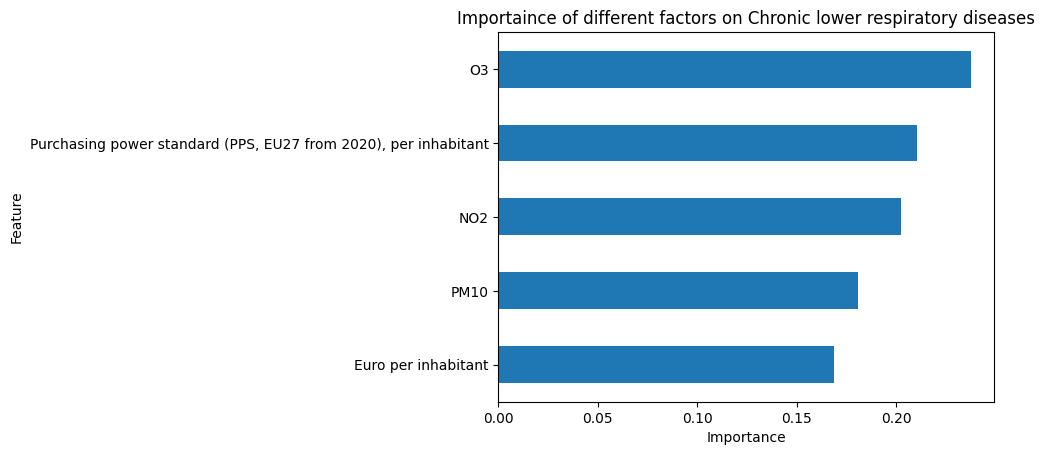

In [382]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the feature importances as a horizontal bar chart
f_importances.plot(kind='barh', ax=ax)

# Invert the y-axis to have the highest importance feature at the top
ax.invert_yaxis()

# Set labels
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Set title
ax.set_title("Importaince of different factors on " + DISEASE)

# Show the plot
plt.show()


In [385]:
# Plot the graph of predicted and actual values and the reg line where the x axis wil be SO2 and y axis will be the disease
plt.scatter(x_test[0], y_test_pred, c = "blue",  label = "Training data")
plt.scatter(x_test[0], y_test, c = "green",  label = "Validation data")
plt.xlabel("Concentration of SO2")
plt.ylabel("Standardized death rate due to " + DISEASE)
plt.legend(loc = 2)
plt.show()


KeyError: 0